---
# 1. Project Overview 
---

# Bank Customer Churn Prediction - Part 2
**Advanced Machine Learning for Financial Services**

In the second phase of the **Bank Customer Churn Prediction** project, we focus on refining feature engineering, applying machine learning models, and evaluating their performance to predict customer churn. The project aims to develop a predictive model capable of identifying customers likely to leave the bank using various customer demographic, behavioral, and financial features.

### Structure of Part 2
1. **Data Preprocessing & Feature Engineering**  
   - Handling categorical and continuous variables  
   - Applying One-Hot Encoding and Label Encoding  
   - Feature scaling and creating engineered features  
   - Addressing class imbalance using sampling techniques  
    

2. **Modeling & Evaluation**  
   - Training various machine learning models:  
     - **Random Forests, XGBoost, Support Vector Machines, MLP, Logistic Regression, Naïve Bayes, K-Nearest Neighbors, Decision Trees**  
   - Hyperparameter tuning using **RandomizedSearchCV** and **GridSearchCV**  
   - Evaluating models using accuracy, precision, recall, F1-score, AUC, and error rates  
    

3. **Conclusion & Next Steps**  
   - Insights into the models' performance  
   - Identification of the most influential features in predicting churn  
   - Recommendations for future improvements and further optimization  

### Key Features
The dataset includes the following features, collected from 10,000 bank customers:
- **Demographic Features**: Age, Gender, Country  
- **Financial Features**: Credit Score, Account Balance, Salary  
- **Behavioral Features**: Number of Products, Credit Card Ownership, Active Membership  
- **Target Variable**: `churn` - whether the customer left the bank (1 for churn, 0 for non-churn)

### Machine Learning Models Used
This study evaluates a variety of machine learning models and compares their predictive power. The models used include:
- **Decision Trees (CART)** → Rule-based classifier to make binary decisions.  
- **K-Nearest Neighbors (KNN)** → Classifies customers based on proximity to others.  
- **Elastic Net** → Linear regression model combining L1 and L2 regularization.  
- **Logistic Regression** → A classic statistical model for binary classification.  
- **Support Vector Machines (SVMs)** → Maximizes the margin between churned and non-churned customers.  
- **Random Forests** → An ensemble model using decision trees to improve prediction accuracy.  
- **Multilayer Perceptron (MLP)** → A neural network model capable of detecting complex patterns.  
- **Naïve Bayes** → A probabilistic classifier that performs well for smaller datasets.  
- **XGBoost** → A gradient boosting model known for its high predictive accuracy.

### Evaluation Metrics
To evaluate model performance, we use the following metrics:
- **Accuracy** → The proportion of correctly classified instances.
- **Precision** → The proportion of correctly predicted churn cases.
- **Recall (Sensitivity)** → The model's ability to correctly identify churned customers.
- **F1-Score** → The harmonic mean of precision and recall.
- **AUC-ROC** → Measures the model's ability to discriminate between churn and non-churn customers.
- **Type I Error (False Negative Rate)** → The rate at which churned customers are misclassified as non-churned.
- **Type II Error (False Positive Rate)** → The rate at which non-churned customers are misclassified as churned.

### Challenges
- **Class Imbalance**: The dataset exhibits a high imbalance, with only about 20% of customers churning. This imbalance can skew model predictions, and balancing techniques like **SMOTE** and **random undersampling** are used to address this.
- **Multicollinearity**: Correlations between features are evaluated using the **Variance Inflation Factor (VIF)**, and features with high multicollinearity are removed to improve model stability.

### Next Steps
1. **Model Refinement**: Based on the feature importance and performance metrics, we will refine the models further to optimize their prediction accuracy.
2. **Feature Engineering**: Explore more advanced techniques for creating new features that could provide better predictive power.
3. **Deploying Model**: Prepare the best-performing model for deployment in a real-world scenario to predict churn in an operational environment.

### Technologies & Tools Used
- **Programming Language**: Python  
- **Libraries**: Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn  
- **Data Processing**: One-Hot Encoding, Standardization, SMOTE  
- **Machine Learning**: RandomizedSearchCV, GridSearchCV, K-Fold Cross-Validation

For further details and to view the project results, please refer to the **bank_churn_II** dataset and its corresponding machine learning pipeline.


## 🔧 Setup  

For this project, we will be using the following Python libraries:

- **pandas**: Data manipulation and analysis, essential for handling structured datasets.
- **numpy**: Numerical computing, used for efficient mathematical operations.
- **matplotlib**: Core visualization library for creating static plots and graphs.
- **seaborn**: Statistical data visualization, used for creating enhanced plots and correlation analysis.
- **scipy**: Statistical tests such as Kolmogorov-Smirnov (KS) and Chi-Square to compare distributions.
- **sklearn.preprocessing (StandardScaler)**: Standardizes features for better model performance.
- **sklearn.ensemble (RandomForestClassifier)**: Machine learning model used for classification and feature importance evaluation.
- **sklearn.model_selection (train_test_split)**: Splits the dataset into training and testing sets for model evaluation.
- **sklearn.feature_selection**: Techniques for selecting the most relevant features, including methods like SequentialFeatureSelector, SelectKBest, f_classif, and RFE.
- **sklearn.linear_model (LogisticRegression)**: Logistic regression model, widely used for binary classification problems.
- **sklearn.tree (DecisionTreeClassifier)**: Decision tree algorithm used for classification.
- **sklearn.neighbors (KNeighborsClassifier)**: A classification algorithm based on proximity.
- **sklearn.svm (SVC)**: Support vector machine used for classification tasks.
- **sklearn.neural_network (MLPClassifier)**: Multi-layer perceptron classifier, used for more complex classification problems.
- **sklearn.naive_bayes (GaussianNB)**: A classifier based on Bayes' theorem.
- **xgboost (XGBClassifier)**: Extreme Gradient Boosting, a high-performance model used for classification.
- **sklearn.metrics**: Contains functions to evaluate the performance of models, including accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, and confusion_matrix.
- **itertools (product)**: Used to compute the cartesian product of iterables for grid search.
- **collections (Counter)**: Used for counting occurrences of elements in a list or other iterable.
- **imbalanced-learn (SMOTE)**: Synthetic Minority Over-sampling Technique for handling imbalanced datasets by generating synthetic samples.

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import ks_2samp, chi2_contingency
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, RandomizedSearchCV, GridSearchCV, StratifiedKFold

from sklearn.feature_selection import SequentialFeatureSelector, SelectKBest, f_classif, RFE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from itertools import product
from collections import Counter
from imblearn.over_sampling import SMOTE

---
# 2- Research methodology 
---

### The Data Source

This **Data Science project** is inspired by the methodology proposed in the research paper **"Propension to Customer Churn in a Financial Institution: A Machine Learning Approach"**, published in *Neural Computing and Applications* by **Renato Alexandre de Lima Lemos, Thiago Christiano Silva, and Benjamin Miranda Tabak**. The study explores **customer churn prediction** using a rich dataset from a **large Brazilian bank**, analyzing customer behavior patterns to uncover the main determinants of client attrition.

The methodology used in this project follows key principles from the paper, adapting **machine learning techniques** for predicting customer churn while integrating industry best practices for data preprocessing, feature selection, and modeling.

### Data Collection and Selection Criteria

The dataset used in this study comes from **Kaggle - Bank Customer Churn Dataset by Gaurav Topre**, containing 10,000 bank customers and their demographic, financial, and behavioral attributes The dataset includes details about account balance, credit card usage, tenure, number of products, salary estimates, and activity levels which are crucial for predicting whether a customer is likely to churn.

To ensure data consistency and representativeness we apply **resampling techniques** to balance the dataset and conduct statistical validation to confirm its alignment with real-world bank churn patterns. These steps help create a **reliable training set** for predictive modeling, minimizing bias and improving model accuracy.

### References (APA 7th Edition)  

- Lemos, R. A. de L., Silva, T. C., & Tabak, B. M. (2022). Propension to customer churn in a financial institution: A machine learning approach. *Neural Computing and Applications, 34*(11751–11768). https://doi.org/10.1007/s00521-022-07067-x  
- Kaggle - Bank Customer Churn Dataset by Gaurav Topre. Retrieved from [Kaggle](https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset)  

---
# 3. Feature Engineering & Data Preprocessing  
---

In [5]:
## Downloading Dataset  
df = pd.read_csv("Bank_Customer_Churn_Prediction.csv")
df.drop(['customer_id'], axis=1, inplace=True)

# Move 'churn' to the first column
df = df[['churn'] + [col for col in df.columns if col != 'churn']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   churn             10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


### Project Features Description

Below is a list of the features used in this project, along with their descriptions:

| **Feature**            | **Usage**             | **Description** |
|------------------------|----------------------|----------------|
| `customer_id`         | ❌ Unused Variable    | Unique customer identifier (account number). |
| `credit_score`        | ✅ Input Feature      | Customer's credit score. |
| `country`            | ✅ Input Feature      | Country of residence of the customer. |
| `gender`             | ✅ Input Feature      | Customer's gender (Male/Female). |
| `age`                | ✅ Input Feature      | Customer's age. |
| `tenure`             | ✅ Input Feature      | Number of years the customer has had an account in the bank. |
| `balance`            | ✅ Input Feature      | Customer's account balance. |
| `products_number`    | ✅ Input Feature      | Number of products the customer has with the bank. |
| `credit_card`        | ✅ Input Feature      | Whether the customer has a credit card (1 = Yes, 0 = No). |
| `active_member`      | ✅ Input Feature      | Whether the customer is an active member of the bank (1 = Yes, 0 = No). |
| `estimated_salary`   | ✅ Input Feature      | Customer's estimated salary. |
| `churn`             | 🎯 Target Variable    | 1 if the customer left the bank, 0 otherwise. |

**Note:** The `customer_id` is not used in the modeling process as it does not provide relevant information for predicting churn.

## 3.1- Transformation of Categorical Variables

The following command applies **One-Hot Encoding** to the `country` variable, creating binary columns for each country.
                                                                                                     
- pd.get_dummies() creates separate columns for each country.
- The drop_first=True parameter removes one category to avoid multicollinearity.
- France is implicit because we drop the first category.

In [6]:
df["country"].value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [7]:
df = pd.get_dummies(df, columns=["country"], drop_first=True) 

**Label Encoding for the binary variable "gender"**

Since `gender` has **only two categories (`Male` and `Female`)**, the best method is **Label Encoding**: ({"Male": 0, "Female": 1})

In [12]:
df["gender"].value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

In [14]:
df["gender"] = df["gender"].map({"Male": 0, "Female": 1})

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   churn             10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   gender            10000 non-null  int64  
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  country_Germany   10000 non-null  bool   
 11  country_Spain     10000 non-null  bool   
dtypes: bool(2), float64(2), int64(8)
memory usage: 800.9 KB


## 3.2- Original Dataset

This dataset **df_original** maintains the initial data structure while applying standardization to enable comparison with the transformed data. The features have been scaled using `StandardScaler` to ensure they have a mean of 0 and a standard deviation of 1. However, no new features have been added or removed, preserving the original dataset's integrity. By preserving the original structure, this dataset can be directly compared to transformed versions to assess the impact of feature engineering and data preprocessing.

In [18]:
# df_original
bank = df.copy()
churn = bank["churn"]  
bank_features = bank.drop(columns=["churn"])  
scaler = StandardScaler()
bank_scaled = scaler.fit_transform(bank_features) 
bank_scaled_df = pd.DataFrame(bank_scaled, columns=bank_features.columns)
df_original = pd.concat([churn, bank_scaled_df], axis=1)
df_original.describe().T

,count,mean,std,min,25%,50%,75%,max
churn,10000.0,2.037000e-01,0.402769,0.000000,0.000000,0.000000,0.000000,1.000000
credit_score,10000.0,-4.824585e-16,1.000050,-3.109504,-0.688359,0.015222,0.698109,2.063884
gender,10000.0,-2.131628e-18,1.000050,-0.912419,-0.912419,-0.912419,1.095988,1.095988
age,10000.0,2.318146e-16,1.000050,-1.994969,-0.660018,-0.183251,0.484225,5.061197
tenure,10000.0,-1.078249e-16,1.000050,-1.733315,-0.695982,-0.004426,0.687130,1.724464
balance,10000.0,-6.252776e-17,1.000050,-1.225848,-1.225848,0.331964,0.819920,2.795323
products_number,10000.0,1.634248e-17,1.000050,-0.911583,-0.911583,-0.911583,0.807737,4.246377
credit_card,10000.0,-5.258016e-17,1.000050,-1.547768,-1.547768,0.646092,0.646092,0.646092
active_member,10000.0,-7.389644e-17,1.000050,-1.030670,-1.030670,0.970243,0.970243,0.970243
estimated_salary,10000.0,-2.877698e-17,1.000050,-1.740268,-0.853594,0.001803,0.857243,1.737200


## 3.3- Adding new features

Lemos et al. (2022) applied a structured approach to feature selection and engineering, combining **expert-driven selection, feature engineering, and iterative refinement**. Initially, they selected features based on **economic relevance** in the banking sector, ensuring they reflected customer churn behavior. Through iterative modeling, they **removed redundant or non-informative attributes**, improving efficiency and model performance. Additionally, they **engineered new features** by calculating differences and percentage changes over a **6-month period**, as well as aggregating financial indicators to better capture customer behavior. This process resulted in a **final dataset with 35 key attributes**, encompassing **transaction-based metrics, financial indicators, and behavioral patterns**. Dimensionality reduction techniques were also applied to eliminate near-zero variance features, ensuring a more effective churn prediction model.

Our dataset differs from the one used in Lemos et al. (2022) as we have **limited information available**. Consequently, our **feature engineering and selection methods will vary**, potentially leading to a different final feature set and predictive performance. Despite these differences, our goal remains the same: to create an optimized dataset that maximizes churn prediction accuracy.


In [20]:
# Categorical Features
df['CreditCategory'] = pd.cut(df['credit_score'], bins=[300, 580, 653, 720, 850], labels=[0, 1, 2, 3]).astype(int)
df['QualityOfBalance'] = pd.cut(df['balance'], bins=[-1, 100, 1000, 10000, 50000, 1000000], labels=[0, 1, 2, 3, 4]).astype(int)
df['AgeGroup'] = pd.cut(df['age'], bins=[14, 24, 34, 44, 54, 64, 100], labels=[0, 1, 2, 3, 4, 5]).astype(int)

# Ratio-Based Features
df['CreditUtilizationRatio'] = df['balance'] / df['estimated_salary']
df['ProductPerTenure'] = df['products_number'] / (df['tenure'] + 1)
df['BalancePerProduct'] = df['balance'] / df['products_number']

# Difference-Based Features
df['IncomeStability'] = df['estimated_salary']- df['balance'] 

# Interaction-Based Features
df['CreditScoreAdjustment'] = df['credit_score'] * df['active_member']
df['Tenure_Active'] = df['tenure'] * df['active_member']
df["Product_active"] = df['products_number'] * df['active_member'] ### new
df["IsActive_by_CreditCard"] = df["credit_card"] * df["active_member"]

# Binary Features
df['churn_risk_age'] = ((df['age'] >= 30) & (df['age'] <= 60)).astype(int) ### new
df['IsSenior'] = df['age'].apply(lambda x: 1 if x >= 60 else 0) 
df['Customer_Status'] = df['tenure'].apply(lambda x: 0 if x < 2 else 1) 

# Geographic and Demographic Features
df['Geo_Gender_Germany'] = df['country_Germany'] + df['gender'] ### new

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   churn                   10000 non-null  int64  
 1   credit_score            10000 non-null  int64  
 2   gender                  10000 non-null  int64  
 3   age                     10000 non-null  int64  
 4   tenure                  10000 non-null  int64  
 5   balance                 10000 non-null  float64
 6   products_number         10000 non-null  int64  
 7   credit_card             10000 non-null  int64  
 8   active_member           10000 non-null  int64  
 9   estimated_salary        10000 non-null  float64
 10  country_Germany         10000 non-null  bool   
 11  country_Spain           10000 non-null  bool   
 12  CreditCategory          10000 non-null  int64  
 13  QualityOfBalance        10000 non-null  int64  
 14  AgeGroup                10000 non-null 

# New Feature Descriptions

To enhance our dataset and align it with a more robust machine learning model, we created the following engineered features:

### Categorical Features
- **Credit Category** (`CreditCategory`) → Categorizes credit scores into four groups: [0, 1, 2, 3].
- **Balance Quality** (`QualityOfBalance`) → Categorizes balance into discrete levels: [0, 1, 2, 3, 4].
- **Age Group** (`AgeGroup`) → Segments customers into socially recognized age groups: [14-24, 25-34, 35-44, 45-54, 55-64, 65+].

### Ratio-Based Features
- **Credit Utilization Ratio** (`CreditUtilizationRatio`) → Measures how much of the bank balance is used in relation to the estimated salary.
- **Product per Tenure** (`ProductPerTenure`) → Calculates the average number of products acquired per year at the bank.
- **Balance per Product** (`BalancePerProduct`) → Represents the average balance per financial product owned by the customer.

### Difference-Based Features
- **Income Stability** (`IncomeStability`) → Calculates the net financial security of the customer by subtracting the balance from the estimated salary.


### Interaction-Based Features
- **Credit Score Adjustment** (`CreditScoreAdjustment`) → Adjusts the credit score based on whether the customer is an active member.
- **Tenure & Active Membership Interaction** (`Tenure_Active`) → Represents the interaction between tenure and active membership, potentially indicating customer loyalty.
- **Product Active** (`Product_active`) → Represents the interaction between the number of products owned and active membership.
- **Active by Credit Card** (`IsActive_by_CreditCard`) → Interaction between having a credit card and being an active member.

### Binary Features
- **Churn Risk Age** (`churn_risk_age`) → Identifies customers in the age range of 30 to 60 (1 for customers in this range, 0 otherwise).
- **IsSenior** (`IsSenior`) → Identifies customers 60 years or older (1 for seniors, 0 otherwise).
- **Customer Status** (`Customer_Status`) → Flags customers with less than 2 years of tenure as 0, otherwise 1.

### Geographic and Demographic Features
- **Geo_Gender_Germany** (`Geo_Gender_Germany`) → Encodes geographic and gender-based information by combining country and gender attributes.

Each of these features enhances the predictive power of our dataset by capturing important **financial behaviors and customer tendencies**.


## 3.4- Standardization  

In [22]:
df.select_dtypes(include=['int64', 'float64']).keys()

Index(['churn', 'credit_score', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'CreditCategory', 'QualityOfBalance', 'AgeGroup',
       'CreditUtilizationRatio', 'ProductPerTenure', 'BalancePerProduct',
       'IncomeStability', 'CreditScoreAdjustment', 'Tenure_Active',
       'Product_active', 'IsActive_by_CreditCard', 'churn_risk_age',
       'IsSenior', 'Customer_Status', 'Geo_Gender_Germany'],
      dtype='object')

In [24]:
continuous_cols = ['credit_score', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 
                   'estimated_salary', 'CreditUtilizationRatio', 'ProductPerTenure', 
                   'BalancePerProduct', 'IncomeStability', 'CreditScoreAdjustment', 'Tenure_Active', 'Product_active', 
                   'IsActive_by_CreditCard', 'churn_risk_age', 'IsSenior', 'Customer_Status', 'Geo_Gender_Germany']

scaler = StandardScaler()
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

### Feature Scaling: Standardization
To ensure a consistent scale across continuous variables, we applied **Standardization (Z-score scaling)** using `StandardScaler`. This transformation standardizes the data by subtracting the mean and dividing by the standard deviation, resulting in a **mean of 0 and a standard deviation of 1**.

**Standardized Variables**
The following continuous variables were standardized because they have different ranges and units, which could affect machine learning models. Additionally, any transformations or derived features involving these variables were also standardized to maintain consistency in scale:

- **`credit_score`** → Varies between 350-850, requiring scaling for consistency.
- **`balance`** → Represents bank balance, which has high variability.
- **`estimated_salary`** → Salary estimates differ significantly across customers.
- **`tenure`** → Duration of the customer's relationship with the bank.
- **`products_number`** → Number of financial products held by the customer.

Furthermore, features derived from these variables, such as **`CreditUtilizationRatio`**, **`ProductPerTenure`**, **`BalancePerProduct`**, **`IncomeStability`**, and **`BalanceToProductRatio`**, were also standardized to ensure they are on the same scale as their original components. This prevents models from being biased by differences in magnitude among variables.

## 3.5- One-Hot Encoding for Categorical Variables

In [26]:
df = pd.get_dummies(df, columns=['CreditCategory', 'QualityOfBalance', 'AgeGroup',], drop_first=True) 

### One-Hot Encoding Instead of Standardization

Some variables, like `CreditCategory`, `QualityOfBalance`, and `AgeGroup`, represent distinct categories rather than continuous numerical values. Standardizing them would create misleading ordinal relationships, implying that higher values are more significant, which is incorrect.  

**Why One-Hot Encoding?**
- **Prevents misleading ordinal influence** → Avoids models interpreting `AgeGroup = 5` as five times more significant than `AgeGroup = 1`.  
- **Eliminates unintended weighting** → Standardization would still treat them as continuous, affecting models like K-Means and linear regression.  
- **Ensures fair category representation** → Converts categories into separate binary features, making them independent.  

**Applied One-Hot Encoding to:**
- `CreditCategory` → `[0,1,2,3]`
- `QualityOfBalance` → `[0,1,2,3,4]`
- `AgeGroup` → `[0,1,2,3,4,5]`  

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   churn                   10000 non-null  int64  
 1   credit_score            10000 non-null  float64
 2   gender                  10000 non-null  float64
 3   age                     10000 non-null  float64
 4   tenure                  10000 non-null  float64
 5   balance                 10000 non-null  float64
 6   products_number         10000 non-null  float64
 7   credit_card             10000 non-null  float64
 8   active_member           10000 non-null  float64
 9   estimated_salary        10000 non-null  float64
 10  country_Germany         10000 non-null  bool   
 11  country_Spain           10000 non-null  bool   
 12  CreditUtilizationRatio  10000 non-null  float64
 13  ProductPerTenure        10000 non-null  float64
 14  BalancePerProduct       10000 non-null 

## 3.6- All Features Dataset

This dataset **df_all_features** includes all engineered features created to enhance the predictive power of our model. At this stage, the dataset contains a comprehensive set of variables capturing financial behaviors, customer tendencies, and interactions. However, from this point forward, we will perform **multicollinearity control**, assessing correlations between features to identify redundant or highly correlated variables. Some features may be removed to improve model performance and interpretability. By maintaining this dataset before feature selection, we ensure a complete reference point for evaluating the impact of removing specific variables during the preprocessing stage.


In [30]:
# df_all_features
df_all_features = df.copy()
df_all_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   churn                   10000 non-null  int64  
 1   credit_score            10000 non-null  float64
 2   gender                  10000 non-null  float64
 3   age                     10000 non-null  float64
 4   tenure                  10000 non-null  float64
 5   balance                 10000 non-null  float64
 6   products_number         10000 non-null  float64
 7   credit_card             10000 non-null  float64
 8   active_member           10000 non-null  float64
 9   estimated_salary        10000 non-null  float64
 10  country_Germany         10000 non-null  bool   
 11  country_Spain           10000 non-null  bool   
 12  CreditUtilizationRatio  10000 non-null  float64
 13  ProductPerTenure        10000 non-null  float64
 14  BalancePerProduct       10000 non-null 

## 3.7- Multicollinearity Detection and Removal

**Overview**
Multicollinearity occurs when two or more independent variables in a dataset are highly correlated, leading to redundancy and instability in predictive models. It can inflate variance, making coefficient estimates unreliable, and negatively impacting the interpretability and performance of machine learning models. This process helps improve model stability, avoids redundancy, and enhances predictive accuracy.

**Variance Inflation Factor (VIF) Interpretation**
To detect multicollinearity, we use the Variance Inflation Factor (VIF). The accepted thresholds are:

- **VIF < 5** → No concerning multicollinearity ✅ (Safe to keep the variable)
- **VIF between 5 and 10** → Moderate multicollinearity ⚠️ (May require evaluation)
- **VIF > 10** → High multicollinearity ❌ (Variable might be redundant and should be removed)

By analyzing VIF values, we can systematically eliminate highly correlated features, ensuring a more stable and interpretable model.

In [32]:
X = df.select_dtypes(include=['int64', 'float64']).drop(columns=["churn"])  # Removendo target

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

vif_data = calculate_vif(X)
print(vif_data)

                   Feature        VIF
0             credit_score   2.019350
1                   gender   2.716497
2                      age   2.556201
3                   tenure   3.371036
4                  balance        inf
5          products_number   4.433767
6              credit_card   2.088072
7            active_member  58.086442
8         estimated_salary        inf
9   CreditUtilizationRatio   1.004395
10        ProductPerTenure   4.342543
11       BalancePerProduct  13.897385
12         IncomeStability        inf
13   CreditScoreAdjustment  47.697735
14           Tenure_Active   4.998311
15          Product_active   8.980122
16  IsActive_by_CreditCard   4.453824
17          churn_risk_age   1.833086
18                IsSenior   2.900962
19         Customer_Status   2.537961
20      Geo_Gender_Germany   2.958027


C:\Users\gusta\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [34]:
df= df.drop(columns= ["balance", "estimated_salary", "IncomeStability", "active_member", "CreditScoreAdjustment"], axis=1)

In [36]:
X = df.select_dtypes(include=['int64', 'float64']).drop(columns=["churn"])  # Removendo target

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

vif_data = calculate_vif(X)
print(vif_data)

                   Feature       VIF
0             credit_score  1.001538
1                   gender  2.583991
2                      age  2.555141
3                   tenure  3.135211
4          products_number  2.761907
5              credit_card  1.888573
6   CreditUtilizationRatio  1.001799
7         ProductPerTenure  4.341681
8        BalancePerProduct  1.766236
9            Tenure_Active  3.933739
10          Product_active  4.332247
11  IsActive_by_CreditCard  3.683497
12          churn_risk_age  1.831062
13                IsSenior  2.900025
14         Customer_Status  2.536668
15      Geo_Gender_Germany  2.726762


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   churn                   10000 non-null  int64  
 1   credit_score            10000 non-null  float64
 2   gender                  10000 non-null  float64
 3   age                     10000 non-null  float64
 4   tenure                  10000 non-null  float64
 5   products_number         10000 non-null  float64
 6   credit_card             10000 non-null  float64
 7   country_Germany         10000 non-null  bool   
 8   country_Spain           10000 non-null  bool   
 9   CreditUtilizationRatio  10000 non-null  float64
 10  ProductPerTenure        10000 non-null  float64
 11  BalancePerProduct       10000 non-null  float64
 12  Tenure_Active           10000 non-null  float64
 13  Product_active          10000 non-null  float64
 14  IsActive_by_CreditCard  10000 non-null 

## 3.8- Handling Imbalanced Data

**Overview**
In our dataset, we observe a **churn ratio of 20.4%**, meaning that **only 20.4% of the customers have churned, while 79.6% have remained.** This imbalance can lead to a biased model that favors the majority class (non-churn), making it less effective in predicting churn cases.

### **Problems Caused by Imbalance**
- **Bias in Model Predictions** → The model might learn to predict the majority class (non-churn) more often, leading to poor recall for the churn class.
- **Misleading Accuracy** → High accuracy can be deceptive if the model predicts mostly non-churn cases while failing to detect actual churn.
- **Poor Generalization** → The model may not perform well on new data, particularly on identifying churn instances.

In [40]:
# Count the number of chrun (1) and non-chrun (0) companies
print(df['churn'].value_counts())
print('-'* 30)
print( f"Churn ratio: {round(len(df[df["churn"] == 1]) / len(df["churn"])*100,1)}%" )  # Chrun ratio

churn
0    7963
1    2037
Name: count, dtype: int64
------------------------------
Churn ratio: 20.4%


### Dataset Balancing Approach

Following **Lemos et al. (2022)**, we address the class imbalance issue by applying **random undersampling**. The authors tackled the problem of class imbalance in customer churn prediction by **randomly selecting a subset of the majority class (non-churn) to match the number of churned customers**. This method prevents the model from being overly biased toward the dominant class while ensuring a balanced dataset.

### **Resampling Strategy**
We implement a similar methodology:
1. **Separating churn and non-churn cases**.
2. **Randomly selecting a subset of non-churned customers** to match the number of churned customers.
3. **Merging both subsets** to create a balanced dataset where both classes have equal representation.
4. **Shuffling the data** to prevent order bias and improve generalization.

By applying this balancing strategy, we obtain a **df_balanced** dataset where the number of churn and non-churn cases is equal. This ensures that our predictive model does not become biased towards the dominant class and can make more reliable predictions across both categories.

### **Conclusion**
Balancing the dataset through **random undersampling**, as implemented by **Lemos et al. (2022)**, is an effective strategy to handle class imbalance in churn prediction. This approach enhances model performance, prevents misleading accuracy metrics, and ensures the model can accurately identify churn cases.


In [42]:
# Balancing the Dataset - df_balanced
churn = df[df["churn"] == 1]
non_churn = df[df["churn"] == 0]

# Randomly select 2037 samples from non-churn to match churn count
non_churn_downsampled = non_churn.sample(n=len(churn), random_state=42)

# Combine the two balanced datasets
df_balanced = pd.concat([churn, non_churn_downsampled])

# Shuffle the dataset to avoid order bias
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the new class distribution
print(df_balanced["churn"].value_counts())

churn
1    2037
0    2037
Name: count, dtype: int64


In [44]:
# Balancing the Dataset - df_all_features_balanced
churn = df_all_features[df_all_features["churn"] == 1]
non_churn = df_all_features[df_all_features["churn"] == 0]
non_churn_downsampled = non_churn.sample(n=len(churn), random_state=42)
df_all_features_balanced = pd.concat([churn, non_churn_downsampled])
df_all_features_balanced = df_all_features_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
print(df_all_features_balanced["churn"].value_counts())

churn
1    2037
0    2037
Name: count, dtype: int64


### 3.8.1- Statistical Tests for Representativeness

**Why Compare Only Non-Churned Instead of the Entire Sample?**

When balancing the dataset, we keep all churned customers (1s) and only downsample the non-churned customers (0s) to create a balanced sample. This means that the churned group remains unchanged, while the non-churned group is modified.

If we compared the entire dataset (churned + non-churned), the changes in distribution would be biased by the churned customers, who were not altered. Instead, by comparing only the non-churned group, we ensure that any statistical differences come only from the downsampling process and not from the original churned population.

### For continuous variables

**Kolmogorov-Smirnov (KS) Test:** is a non-parametric statistical test used to compare the distributions of two datasets by measuring the maximum difference between their empirical cumulative distribution functions (ECDFs). It helps determine whether two samples come from the same distribution, making it useful for evaluating the representativeness of a balanced dataset compared to the original. The test returns a KS statistic (D) and a p-value:

- **p > 0.05** → Fail to reject the null hypothesis (distributions are similar).
- **p ≤ 0.05** → Reject the null hypothesis (distributions are significantly different).

In [46]:
df_non_churn = df[df["churn"] == 0]  # Original non-churned
df_balanced_non_churn = df_balanced[df_balanced["churn"] == 0]  # Downsampled non-churned

# Continuous (Numerical) Features
continuous_cols = [
    "credit_score", "age", "tenure", "products_number",
    "CreditUtilizationRatio", "ProductPerTenure", "BalancePerProduct",
    "Tenure_Active", "Product_active", "IsActive_by_CreditCard",
    "churn_risk_age", "Customer_Status"
]
ks_results = []

# Perform KS test for each continuous variable
for col in continuous_cols:
    stat, p_value = ks_2samp(df_non_churn[col], df_balanced_non_churn[col])
    ks_results.append({"Variable": col, "KS Statistic": round(stat, 4), "p-value": round(p_value, 4)})

ks_df = pd.DataFrame(ks_results)

ks_df["Result"] = ks_df["p-value"].apply(lambda x: "Reject Null (Significantly Different)" if x <= 0.05 else "Fail to Reject Null (Similar)")

ks_df

,Variable,KS Statistic,p-value,Result
0,credit_score,0.0149,0.8569,Fail to Reject Null (Similar)
1,age,0.0091,0.9992,Fail to Reject Null (Similar)
2,tenure,0.0145,0.8805,Fail to Reject Null (Similar)
3,products_number,0.0030,1.0000,Fail to Reject Null (Similar)
4,CreditUtilizationRatio,0.0082,0.9999,Fail to Reject Null (Similar)
5,ProductPerTenure,0.0115,0.9805,Fail to Reject Null (Similar)
6,BalancePerProduct,0.0087,0.9996,Fail to Reject Null (Similar)
7,Tenure_Active,0.0138,0.9102,Fail to Reject Null (Similar)
8,Product_active,0.0075,1.0000,Fail to Reject Null (Similar)
9,IsActive_by_CreditCard,0.0091,0.9991,Fail to Reject Null (Similar)


### For categorical variables 
Chi-Square Test: is a statistical test used to compare the distribution of categorical variables between two datasets. It evaluates whether there is a significant association between two categorical variables by comparing the observed and expected frequencies. This test is useful for checking if the balanced dataset maintains the same categorical distribution as the original. The test returns a Chi-Square statistic (χ²) and a p-value:

- **p > 0.05** → Fail to reject the null hypothesis (categorical distributions are similar).
- **p ≤ 0.05** → Reject the null hypothesis (categorical distributions are significantly different).

In [48]:
df_non_churn = df[df["churn"] == 0]  # Original non-churned
df_balanced_non_churn = df_balanced[df_balanced["churn"] == 0]  # Downsampled non-churned

# Categorical (Boolean) Features
categorical_cols = [
    "gender", "credit_card", "Geo_Gender_Germany", "IsSenior",
    "country_Germany", "country_Spain",
    "CreditCategory_1", "CreditCategory_2", "CreditCategory_3",
    "QualityOfBalance_2", "QualityOfBalance_3", "QualityOfBalance_4",
    "AgeGroup_1", "AgeGroup_2", "AgeGroup_3", "AgeGroup_4", "AgeGroup_5"
]

# Create a list to store results
chi2_results = []

# Perform Chi-Square test for each categorical variable
for col in categorical_cols:
    contingency_table = pd.crosstab(df_non_churn[col], df_balanced_non_churn[col])
    stat, p_value, _, _ = chi2_contingency(contingency_table)
    
    # Store results
    chi2_results.append({"Variable": col, "Chi-Square Statistic": round(stat, 4), "p-value": round(p_value, 4)})

# Convert results into a DataFrame
chi2_df = pd.DataFrame(chi2_results)

# Add a column to indicate whether we reject the null hypothesis (distribution significantly different)
chi2_df["Result"] = chi2_df["p-value"].apply(lambda x: "Reject Null (Significantly Different)" if x <= 0.05 else "Fail to Reject Null (Similar)")

# Display results
chi2_df

,Variable,Chi-Square Statistic,p-value,Result
0,gender,1.1066,0.2928,Fail to Reject Null (Similar)
1,credit_card,3.8899,0.0486,Reject Null (Significantly Different)
2,Geo_Gender_Germany,3.1968,0.5254,Fail to Reject Null (Similar)
3,IsSenior,1.7193,0.1898,Fail to Reject Null (Similar)
4,country_Germany,0.7817,0.3766,Fail to Reject Null (Similar)
5,country_Spain,0.5548,0.4564,Fail to Reject Null (Similar)
6,CreditCategory_1,0.2165,0.6417,Fail to Reject Null (Similar)
7,CreditCategory_2,1.1236,0.2891,Fail to Reject Null (Similar)
8,CreditCategory_3,0.5329,0.4654,Fail to Reject Null (Similar)
9,QualityOfBalance_2,0.0000,1.0000,Fail to Reject Null (Similar)


In [50]:
len(continuous_cols) + len(categorical_cols), set(continuous_cols) & set(categorical_cols)

(29, set())

### Final Conclusion: The Balanced Sample is Statistically Similar

After performing statistical tests (Kolmogorov-Smirnov for continuous variables and Chi-Square for categorical variables), we conclude that the balanced dataset closely resembles the original non-churned sample.

- All continuous variables did not show significant differences (p > 0.05), confirming that their distributions remain similar after resampling.
- Most categorical variables also showed no significant differences indicating that their distributions were preserved.
- A few categorical variables were significantly different credit_card, AgeGroup_1, AgeGroup_2) but their impact on the model may be minor.

Overall, the balanced dataset is a good representation of the original sample and can be used for modeling. If needed, additional refinement can further reduce discrepancies.

## 3.9- Variance Analysis

### What is the most commonly used variance threshold?

The threshold value **depends on the type of data** in the dataset:

| **Threshold (`limiar`)** | **When to use?** | **Impact** |
|--------------------------|------------------|-------------|
| `0.0` *(default in Scikit-Learn)* | Keeps all variables, even those with very low variance. | No removal. |
| **`0.01`** *(most common standard)* | Removes variables that change very little and are not informative. | **Recommended in most cases.** |
| `0.05` | If the dataset has many variables and some are almost constant. | Removes variables with small variations. |
| `0.1` or higher | If there are many features and a suspicion of redundant variables. | Can be too aggressive. |

In [52]:
# Low Variance Features
feature_variances = df_balanced.select_dtypes(include=["number"]).var()
low_variance_features = feature_variances[feature_variances < 1e-2]  
print("Features with very low variance:", low_variance_features.index.tolist())

Features with very low variance: []


## 3.10- Representativeness of our sample - Correlation matrix

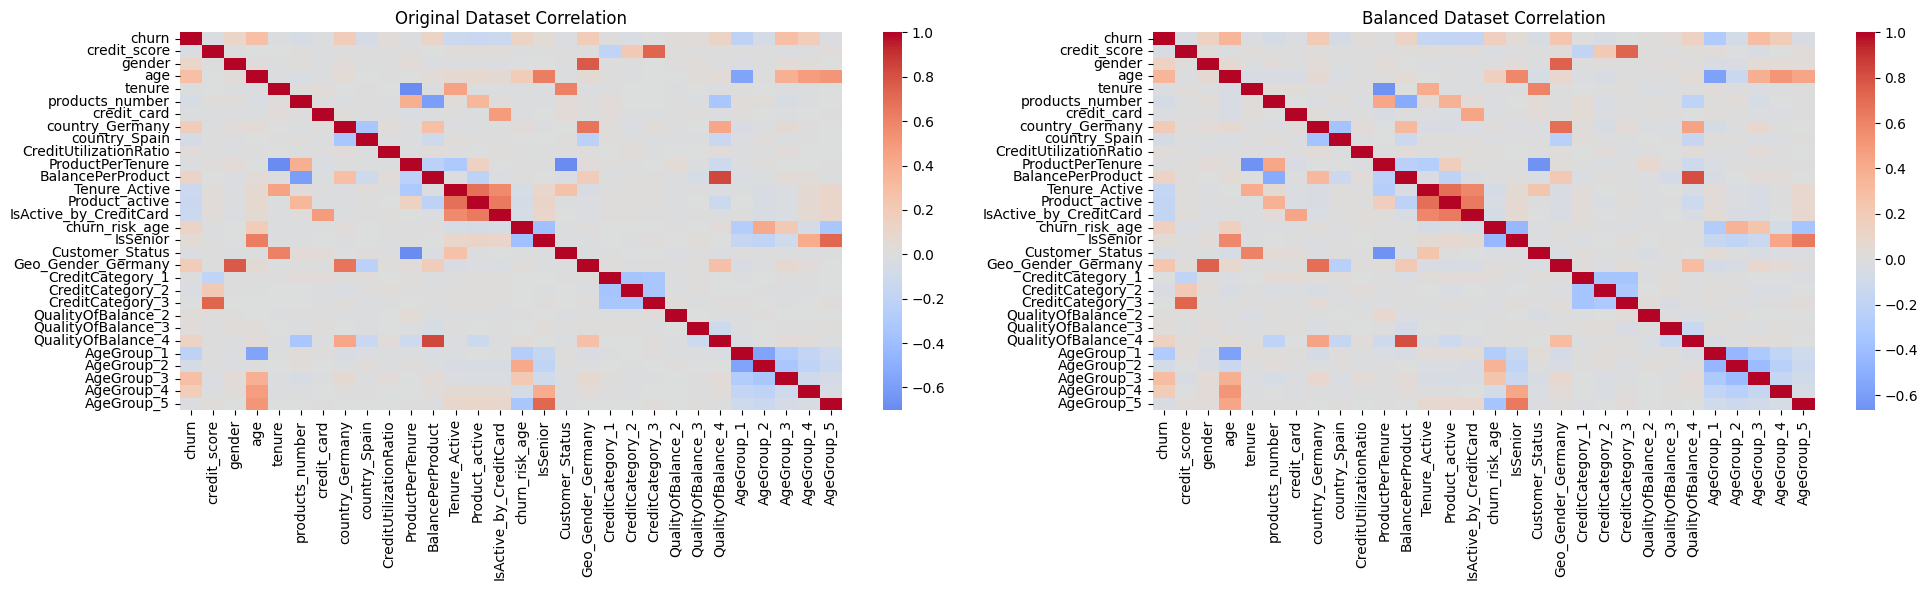

In [54]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Adjust figsize as needed

# Heatmap of the original dataset
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", center=0, ax=axes[0])
axes[0].set_title("Original Dataset Correlation")

# Heatmap of the balanced dataset
sns.heatmap(df_balanced.corr(), annot=False, cmap="coolwarm", center=0, ax=axes[1])
axes[1].set_title("Balanced Dataset Correlation")

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

### 3.10.1- Identifying Highly Correlated Features - Balanced Dataset

In [56]:
# Compute correlation of all features with the target variable "Churn"
target_correlation = df_balanced.corr(numeric_only=True)["churn"].sort_values()
target_correlation

AgeGroup_1               -0.289911
IsActive_by_CreditCard   -0.176935
Product_active           -0.175925
Tenure_Active            -0.167980
AgeGroup_2               -0.068331
country_Spain            -0.059696
products_number          -0.054669
Customer_Status          -0.046099
credit_score             -0.034660
AgeGroup_5               -0.032233
CreditCategory_2         -0.029340
credit_card              -0.017800
tenure                   -0.016491
CreditCategory_3         -0.008593
CreditCategory_1         -0.007126
ProductPerTenure          0.004821
QualityOfBalance_2        0.015669
CreditUtilizationRatio    0.019279
QualityOfBalance_3        0.024894
IsSenior                  0.042796
BalancePerProduct         0.132524
gender                    0.141422
QualityOfBalance_4        0.142051
churn_risk_age            0.156844
AgeGroup_4                0.187196
country_Germany           0.204079
Geo_Gender_Germany        0.238541
AgeGroup_3                0.302474
age                 

### 3.11- Feature Importance Using Random Forest - Balanced Dataset

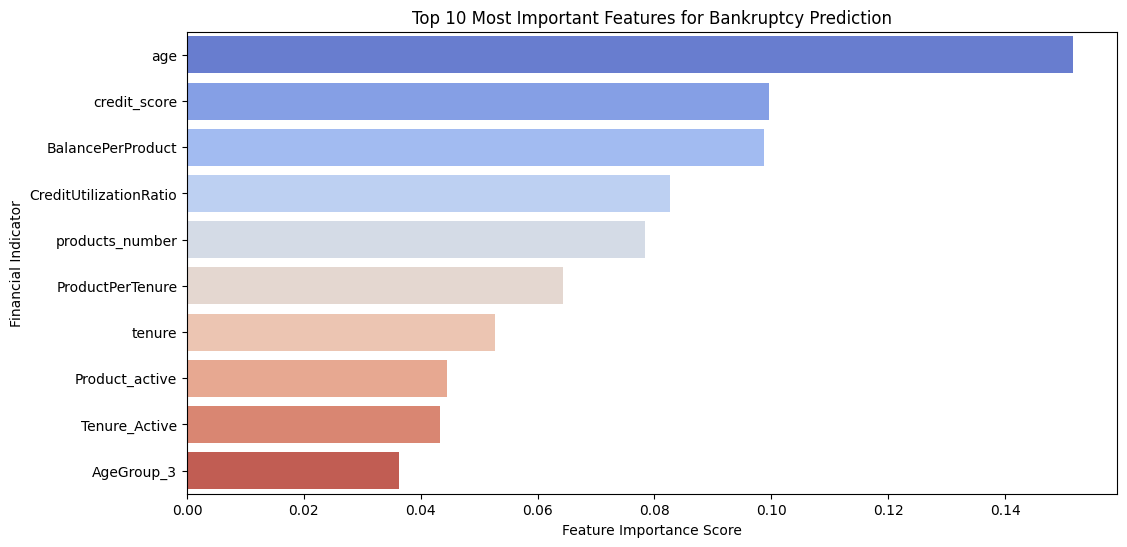


Features Importance in balanced dataset:


,Feature,Importance
0,age,0.151580
1,credit_score,0.099542
2,BalancePerProduct,0.098766
3,CreditUtilizationRatio,0.082606
4,products_number,0.078311
5,ProductPerTenure,0.064282
6,tenure,0.052671
7,Product_active,0.044457
8,Tenure_Active,0.043363
9,AgeGroup_3,0.036300


In [58]:
# Define features and target variable
X = df_balanced.drop(columns=["churn"])
y = df_balanced["churn"]

# Train a simple Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Extract feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot top 10 most important features
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance[:10], y=feature_importance.index[:10], hue=feature_importance.index[:10], dodge=False, legend=False, palette="coolwarm")
plt.title("Top 10 Most Important Features for Chrun Prediction")
plt.xlabel("Feature Importance Score")
plt.ylabel("Financial Indicator")
plt.show()

print("\nFeatures Importance in balanced dataset:")
feature_df = feature_importance.to_frame().reset_index()
feature_df.columns = ["Feature", "Importance"]
styled_feature_df = feature_df.style.background_gradient(cmap="coolwarm")
styled_feature_df

---
# 4. Modeling & Evaluation  
---

## 4.1- Splitting the Dataset into Training and Testing Sets (80/20)

In [60]:
# Define the target variable (y) and features (X)
X = df_balanced.drop(columns=["churn"])  # Assuming 'churn' is the target variable
y = df_balanced["churn"]

# Perform an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (3259, 29) (3259,)
Testing set shape: (815, 29) (815,)


## 4.2- Hyperparameter Tuning for Machine Learning Models

**Objective**
This code performs hyperparameter tuning for various machine learning models used in predicting customer churn. The goal is to identify the best combination of hyperparameters for each model to optimize their predictive performance. 

**Model Selection and Hyperparameter Tuning:**
   - Several machine learning models are initialized, including Decision Trees, K-Nearest Neighbors, Elastic Net, Logistic Regression, SVMs, Random Forests, MLP, Naïve Bayes, and XGBoost.
   - Hyperparameter tuning is conducted using `RandomizedSearchCV` to efficiently search for optimal values.
   - The best hyperparameters for each model are selected based on cross-validation results.

In [117]:
# Cross-validation strategy using Stratified K-Fold
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary with models and hyperparameters for tuning
param_grid = {
    "Decision Trees - Paper": {
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    },
    "K-Nearest Neighbors - Paper": {
        "n_neighbors": [3, 5, 7, 10],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    },
    "Elastic Net - Paper": {
        "C": [0.01, 0.1, 1, 10],
        "l1_ratio": [0.2, 0.5, 0.8, 0.9],
        "max_iter": [5000]
    },
    "Logistic Regression - Paper": {
        "C": [0.01, 0.1, 1, 10, 100]
    },
    "SVMs - Paper": {
        "C": [0.1, 1, 10, 100],
        "gamma": ["scale", "auto"],
        "kernel": ["linear", "rbf", "poly"]
    },
    "Random Forests - Paper": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "MLP - Additional": {
        "hidden_layer_sizes": [(16,), (32, 16), (64, 32, 16)],
        "activation": ["relu", "tanh"],
        "solver": ["adam", "lbfgs"],
        "alpha": [0.0001, 0.001, 0.01],  # Regularization
        "learning_rate_init": [0.0001, 0.0005, 0.001],
        "max_iter": [5000]
    },
    "Naïve Bayes (NB) - Additional": {},  # No hyperparameters to tune
    "XGBoost - Additional": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7],
        "subsample": [0.6, 0.8, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0],
        "reg_alpha": [0, 0.1, 1],
        "reg_lambda": [1, 10]
    }
}

# Dictionary to store model instances
models = {
    "Decision Trees - Paper": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors - Paper": KNeighborsClassifier(),
    "Elastic Net - Paper": LogisticRegression(penalty='elasticnet', solver='saga', random_state=42),
    "Logistic Regression - Paper": LogisticRegression(penalty='l2', solver='liblinear', random_state=42),
    "SVMs - Paper": SVC(probability=True, random_state=42),
    "Random Forests - Paper": RandomForestClassifier(random_state=42),
    "MLP - Additional": MLPClassifier(max_iter=1000, random_state=42),
    "Naïve Bayes (NB) - Additional": GaussianNB(),
    "XGBoost - Additional": XGBClassifier(eval_metric='logloss', random_state=42)
}

# Perform hyperparameter tuning
best_params = {}
for model_name, model in models.items():
    if param_grid.get(model_name):  # Only tune models that have a parameter grid
        # Compute the number of possible hyperparameter combinations
        total_combinations = len(list(product(*param_grid[model_name].values())))

        # Set n_iter to the minimum between total combinations and 10
        n_iter_value = min(10, total_combinations)

        search = RandomizedSearchCV(
            model, 
            param_distributions=param_grid[model_name], 
            n_iter=n_iter_value,  # Ensuring it does not exceed possible combinations
            cv=cv_strategy,  
            n_jobs=-1, 
            random_state=42
        )
        search.fit(X_train, y_train)

        # Refine with GridSearch on the best parameters found in RandomizedSearchCV
        best_params_random = search.best_params_
        grid_search = GridSearchCV(
            model, 
            param_grid={k: [v] for k, v in best_params_random.items()}, 
            cv=cv_strategy, 
            n_jobs=-1
        )
        grid_search.fit(X_train, y_train)

        best_params[model_name] = grid_search.best_params_
    else:
        best_params[model_name] = "Default parameters used"

# Display best parameters
for model, params in best_params.items():
    print(f"Best parameters for {model}: {params}")

Best parameters for Decision Trees - Paper: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}
Best parameters for K-Nearest Neighbors - Paper: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best parameters for Elastic Net - Paper: {'C': 1, 'l1_ratio': 0.9, 'max_iter': 5000}
Best parameters for Logistic Regression - Paper: {'C': 100}
Best parameters for SVMs - Paper: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
Best parameters for Random Forests - Paper: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best parameters for MLP - Additional: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (16,), 'learning_rate_init': 0.001, 'max_iter': 5000, 'solver': 'adam'}
Best parameters for Naïve Bayes (NB) - Additional: Default parameters used
Best parameters for XGBoost - Additional: {'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.6}

## 4.3- Model 1: df_balanced

A **balanced** model **with** multicollinearity control applied.

In [62]:
# Number of folds for cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Dictionary to store model instances with best hyperparameters
models_model1 = {
    "Decision Trees - Paper": DecisionTreeClassifier(min_samples_split=10, max_depth=10, criterion='gini', random_state=42),
    "K-Nearest Neighbors - Paper": KNeighborsClassifier(weights='distance', n_neighbors=5, metric='manhattan'),  
    "Elastic Net - Paper": LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=0.1, max_iter=5000, random_state=42),
    "Logistic Regression - Paper": LogisticRegression(penalty='l2', solver='liblinear', C=0.1, random_state=42),
    "SVMs - Paper": SVC(probability=True, kernel='rbf', gamma='scale', C=10, random_state=42),
    "Random Forests - Paper": RandomForestClassifier(n_estimators=100, min_samples_leaf=2, min_samples_split=2, max_depth=None, random_state=42),  
    "MLP - Additional": MLPClassifier(solver='adam', learning_rate_init=0.0001, hidden_layer_sizes=(16,), activation='relu', max_iter=5000, random_state=42),
    "Naïve Bayes (NB) - Additional": GaussianNB(),
    "XGBoost - Additional": XGBClassifier(colsample_bytree=1.0, n_estimators=50, max_depth=7, learning_rate=0.01, reg_alpha=1, reg_lambda=10, 
                                          subsample=0.6, random_state=42)  
}

# Dictionaries to store results for Model 1
results_model1 = {model: {} for model in models_model1.keys()}  # Store performance metrics
roc_data_model1 = {model: [] for model in models_model1.keys()}  # Store y_test and y_prob for ROC Curve plotting

# Extract features (X_folds) and target variable (y_folds) for cross-validation
folds_selected_model1 = df_balanced.copy()  # Ensuring we don't modify the original dataset
X_folds_model1 = folds_selected_model1.drop(columns=["churn"])  # Use .drop() to remove target variable properly
y_folds_model1 = folds_selected_model1["churn"]  # Target variable (Churn)

# Perform K-Fold Cross-Validation
for i, (train_index, val_index) in enumerate(kf.split(X_folds_model1)):
    X_train_folds_model1, X_val_folds_model1 = X_folds_model1.iloc[train_index], X_folds_model1.iloc[val_index]
    y_train_folds_model1, y_val_folds_model1 = y_folds_model1.iloc[train_index], y_folds_model1.iloc[val_index]

    for model_name, model in models_model1.items():
        # Train model
        model.fit(X_train_folds_model1, y_train_folds_model1)
        
        # Make predictions
        y_pred = model.predict(X_val_folds_model1)
        y_prob = model.predict_proba(X_val_folds_model1)[:, 1] if hasattr(model, "predict_proba") else y_pred
        
        # Compute confusion matrix
        cm = confusion_matrix(y_val_folds_model1, y_pred)
        TN, FP, FN, TP = cm.ravel()
        
        # Store performance metrics
        results_model1[model_name][f"Fold_{i}"] = {
            "Accuracy": accuracy_score(y_val_folds_model1, y_pred),
            "Precision": precision_score(y_val_folds_model1, y_pred, zero_division=1),
            "Recall": recall_score(y_val_folds_model1, y_pred),
            "F1-Score": f1_score(y_val_folds_model1, y_pred),
            "AUC": roc_auc_score(y_val_folds_model1, y_prob),
            "Type I Error (FN Rate)": FN / (FN + TP) if (FN + TP) > 0 else 0,
            "Type II Error (FP Rate)": FP / (FP + TN) if (FP + TN) > 0 else 0
        }

        # Store actual labels and predicted probabilities for ROC Curve plotting
        roc_data_model1[model_name].append((y_val_folds_model1, y_prob))

# Convert results dictionary to DataFrame for easy comparison
results_df_model1 = {model: pd.DataFrame.from_dict(results_model1[model], orient="index") for model in models_model1.keys()}

# Compute overall average metrics across all folds
average_metrics_model1 = {model: dfk.mean() for model, dfk in results_df_model1.items()}
summary_df_model1 = pd.DataFrame(average_metrics_model1).T  # Transpose for better readability

# Train all models on the full training dataset (specific to df_balanced)
trained_models_model1 = {}

for model_name, model in models_model1.items():
    # Train model on entire training data
    model.fit(X_train, y_train)
    
    # Store trained model
    trained_models_model1[model_name] = model

print("✅ All models trained on the full training set and stored in 'trained_models_model1'.")
print("-" * 100)

# Display summary metrics
print("Summary of average metrics across Model 1: df_balanced")
summary_df_model1.sort_values(by="Accuracy", ascending=False)

✅ All models trained on the full training set and stored in 'trained_models_model1'.
----------------------------------------------------------------------------------------------------
Summary of average metrics across Model 1: df_balanced


,Accuracy,Precision,Recall,F1-Score,AUC,Type I Error (FN Rate),Type II Error (FP Rate)
XGBoost - Additional,0.772960,0.768267,0.782095,0.774957,0.849863,0.217905,0.235932
Random Forests - Paper,0.769764,0.780638,0.751083,0.765348,0.852310,0.248917,0.211532
MLP - Additional,0.767313,0.778194,0.747675,0.762537,0.852549,0.252325,0.213147
SVMs - Paper,0.755774,0.770261,0.730009,0.749304,0.828325,0.269991,0.218244
K-Nearest Neighbors - Paper,0.737113,0.751214,0.709474,0.729353,0.804141,0.290526,0.235039
Decision Trees - Paper,0.725579,0.735239,0.705935,0.719976,0.779940,0.294065,0.255043
Elastic Net - Paper,0.720178,0.729307,0.702406,0.715027,0.790830,0.297594,0.261724
Logistic Regression - Paper,0.718458,0.728519,0.698441,0.712636,0.790982,0.301559,0.261241
Naïve Bayes (NB) - Additional,0.584450,0.823317,0.213646,0.329390,0.783512,0.786354,0.045925


## 4.4- Model 2: df_all_features_balanced

A **balanced** model **with all features** and **without** multicollinearity control.

In [65]:
# Define the target variable (y) and features (X)
X_model2 = df_all_features_balanced.drop(columns=["churn"])  # Features for Model 2
y_model2 = df_all_features_balanced["churn"]  # Target variable for Model 2

# Perform an 80/20 split for Model 2
X_train_model2, X_test_model2, y_train_model2, y_test_model2 = train_test_split(X_model2, y_model2, test_size=0.2, random_state=42, stratify=y_model2)

# Number of folds for cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Dictionary to store model instances with best hyperparameters for Model 2
models_model2 = {
    "Decision Trees - Paper": DecisionTreeClassifier(min_samples_split=10, max_depth=10, criterion='gini', random_state=42),
    "K-Nearest Neighbors - Paper": KNeighborsClassifier(weights='distance', n_neighbors=5, metric='manhattan'),  
    "Elastic Net - Paper": LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=0.1, max_iter=5000, random_state=42),
    "Logistic Regression - Paper": LogisticRegression(penalty='l2', solver='liblinear', C=0.1, random_state=42),
    "SVMs - Paper": SVC(probability=True, kernel='rbf', gamma='scale', C=10, random_state=42),
    "Random Forests - Paper": RandomForestClassifier(n_estimators=100, min_samples_leaf=2, min_samples_split=2, max_depth=None, random_state=42),  
    "MLP - Additional": MLPClassifier(solver='adam', learning_rate_init=0.0001, hidden_layer_sizes=(16,), activation='relu', max_iter=5000, random_state=42),
    "Naïve Bayes (NB) - Additional": GaussianNB(),
    "XGBoost - Additional": XGBClassifier(colsample_bytree=1.0, n_estimators=50, max_depth=7, learning_rate=0.01, reg_alpha=1, reg_lambda=10, 
                                          subsample=0.6, random_state=42)  
}

# Dictionaries to store results for Model 2
results_model2 = {model: {} for model in models_model2.keys()}  # Store performance metrics
roc_data_model2 = {model: [] for model in models_model2.keys()}  # Store y_test and y_prob for ROC Curve plotting

# Extract features (X_folds) and target variable (y_folds) for cross-validation
folds_selected_model2 = df_all_features_balanced.copy()  # Ensuring we don't modify the original dataset
X_folds_model2 = folds_selected_model2.drop(columns=["churn"])  # Use .drop() to remove target variable properly
y_folds_model2 = folds_selected_model2["churn"]  # Target variable (Churn)

# Perform K-Fold Cross-Validation
for i, (train_index, val_index) in enumerate(kf.split(X_folds_model2)):
    X_train_folds_model2, X_val_folds_model2 = X_folds_model2.iloc[train_index], X_folds_model2.iloc[val_index]
    y_train_folds_model2, y_val_folds_model2 = y_folds_model2.iloc[train_index], y_folds_model2.iloc[val_index]

    for model_name, model in models_model2.items():
        # Train model
        model.fit(X_train_folds_model2, y_train_folds_model2)
        
        # Make predictions
        y_pred = model.predict(X_val_folds_model2)
        y_prob = model.predict_proba(X_val_folds_model2)[:, 1] if hasattr(model, "predict_proba") else y_pred
        
        # Compute confusion matrix
        cm = confusion_matrix(y_val_folds_model2, y_pred)
        TN, FP, FN, TP = cm.ravel()
        
        # Store performance metrics
        results_model2[model_name][f"Fold_{i}"] = {
            "Accuracy": accuracy_score(y_val_folds_model2, y_pred),
            "Precision": precision_score(y_val_folds_model2, y_pred, zero_division=1),
            "Recall": recall_score(y_val_folds_model2, y_pred),
            "F1-Score": f1_score(y_val_folds_model2, y_pred),
            "AUC": roc_auc_score(y_val_folds_model2, y_prob),
            "Type I Error (FN Rate)": FN / (FN + TP) if (FN + TP) > 0 else 0,
            "Type II Error (FP Rate)": FP / (FP + TN) if (FP + TN) > 0 else 0
        }

        # Store actual labels and predicted probabilities for ROC Curve plotting
        roc_data_model2[model_name].append((y_val_folds_model2, y_prob))

# Convert results dictionary to DataFrame for easy comparison
results_df_model2 = {model: pd.DataFrame.from_dict(results_model2[model], orient="index") for model in models_model2.keys()}

# Compute overall average metrics across all folds
average_metrics_model2 = {model: dfk.mean() for model, dfk in results_df_model2.items()}
summary_df_model2 = pd.DataFrame(average_metrics_model2).T  # Transpose for better readability

# Train all models on the full training dataset (specific to df_all_features_balanced)
trained_models_model2 = {}

for model_name, model in models_model2.items():
    # Train model on entire training data
    model.fit(X_train_model2, y_train_model2)
    
    # Store trained model
    trained_models_model2[model_name] = model

print("✅ All models trained on the full training set and stored in 'trained_models_model2'.")
print("-" * 100)

# Display summary metrics
print("Summary of average metrics across Model 2: df_all_features_balanced")
summary_df_model2.sort_values(by="Accuracy", ascending=False)

✅ All models trained on the full training set and stored in 'trained_models_model2'.
----------------------------------------------------------------------------------------------------
Summary of average metrics across Model 2: df_all_features_balanced


,Accuracy,Precision,Recall,F1-Score,AUC,Type I Error (FN Rate),Type II Error (FP Rate)
XGBoost - Additional,0.774183,0.770318,0.782221,0.775929,0.849508,0.217779,0.233488
Random Forests - Paper,0.768542,0.778577,0.751498,0.764537,0.853291,0.248502,0.214507
MLP - Additional,0.765105,0.779938,0.738613,0.758583,0.850348,0.261387,0.208735
SVMs - Paper,0.753320,0.764547,0.732334,0.747937,0.831595,0.267666,0.225716
Decision Trees - Paper,0.730239,0.735161,0.721349,0.727872,0.779218,0.278651,0.260898
K-Nearest Neighbors - Paper,0.726805,0.741966,0.695340,0.717584,0.801013,0.304660,0.241999
Elastic Net - Paper,0.722631,0.732296,0.703251,0.716888,0.793680,0.296749,0.257745
Logistic Regression - Paper,0.720665,0.729264,0.702843,0.715343,0.793363,0.297157,0.261183
Naïve Bayes (NB) - Additional,0.593532,0.849081,0.228865,0.351298,0.786076,0.771135,0.043012


## 4.5- Model 3: df_all_features - SMOTE
A **balanced** model **with all features** and **without multicollinearity** control, using **SMOTE** for class balancing.

In [68]:
# Define the target variable (y) and features (X)
X_smote = df_all_features.drop(columns=["churn"])  # Features
y_smote = df_all_features["churn"]  # Target variable

# Splitting Train and Test Data (10% test size, stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote, test_size=0.1, stratify=y_smote, random_state=42
)

# Setting up Stratified K-Fold Cross Validation (10 folds)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define machine learning models
models = {
    "SVM": SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42, probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "CART": DecisionTreeClassifier(criterion="gini", random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(32, 16), activation='relu', solver='adam',
                          learning_rate_init=0.0005, max_iter=10000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, criterion="gini", random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, eval_metric='logloss', random_state=42),
    "Logistic Regression": LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
}

# Dictionary to store results
results = {model: {} for model in models.keys()}
roc_data_new = {model: [] for model in models.keys()}  # Store y_test and y_prob for ROC Curve plotting

# Iterate over the folds and apply SMOTE in the training set
for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train)):
    print(f"\n Processing Fold {fold_idx + 1}")

    # Splitting into training and validation sets
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Apply SMOTE only to the training set (Never to validation/test)
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_fold, y_train_fold)

    # Checking class distribution before and after SMOTE
    print("Before SMOTE:", Counter(y_train_fold))
    print("After SMOTE:", Counter(y_train_resampled))

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train_resampled, y_train_resampled)
        
        # Make predictions
        y_pred = model.predict(X_val_fold)
        y_prob = model.predict_proba(X_val_fold)[:, 1] if hasattr(model, "predict_proba") else y_pred
        
        # Compute confusion matrix with error handling
        if len(np.unique(y_pred)) < 2:
            TN, FP, FN, TP = confusion_matrix(y_val_fold, y_pred, labels=[0, 1]).ravel()
        else:
            TN, FP, FN, TP = confusion_matrix(y_val_fold, y_pred).ravel()
        
        # Store metrics
        results[model_name][f"Fold_{fold_idx}"] = {
            "Accuracy": accuracy_score(y_val_fold, y_pred),
            "Precision": precision_score(y_val_fold, y_pred, zero_division=1),
            "Recall": recall_score(y_val_fold, y_pred),
            "F1-Score": f1_score(y_val_fold, y_pred),
            "AUC": roc_auc_score(y_val_fold, y_prob),
            "Type I Error (FN Rate)": FN / (FN + TP) if (FN + TP) > 0 else 0,
            "Type II Error (FP Rate)": FP / (FP + TN) if (FP + TN) > 0 else 0,
        }
        # Store actual labels and predicted probabilities for ROC Curve plotting
        roc_data_new[model_name].append((y_val_fold, y_prob))

# Convert results to DataFrame for easy comparison
results_df = {model: pd.DataFrame.from_dict(results[model], orient="index") for model in models.keys()}

# Compute overall average metrics and store them in a summary DataFrame
average_metrics = {model: dfk.mean() for model, dfk in results_df.items()}
summary_df_smote = pd.DataFrame(average_metrics).T 

# Display summary of average model performance
print("Summary of average metrics across Model 3: df_all_features - SMOTE")
summary_df_smote.sort_values(by="Accuracy", ascending=False)


 Processing Fold 1
Before SMOTE: Counter({0: 6450, 1: 1650})
After SMOTE: Counter({0: 6450, 1: 6450})

 Processing Fold 2
Before SMOTE: Counter({0: 6450, 1: 1650})
After SMOTE: Counter({0: 6450, 1: 6450})

 Processing Fold 3
Before SMOTE: Counter({0: 6450, 1: 1650})
After SMOTE: Counter({0: 6450, 1: 6450})

 Processing Fold 4
Before SMOTE: Counter({0: 6450, 1: 1650})
After SMOTE: Counter({0: 6450, 1: 6450})

 Processing Fold 5
Before SMOTE: Counter({0: 6450, 1: 1650})
After SMOTE: Counter({0: 6450, 1: 6450})

 Processing Fold 6
Before SMOTE: Counter({0: 6450, 1: 1650})
After SMOTE: Counter({0: 6450, 1: 6450})

 Processing Fold 7
Before SMOTE: Counter({0: 6450, 1: 1650})
After SMOTE: Counter({0: 6450, 1: 6450})

 Processing Fold 8
Before SMOTE: Counter({0: 6451, 1: 1649})
After SMOTE: Counter({0: 6451, 1: 6451})

 Processing Fold 9
Before SMOTE: Counter({0: 6451, 1: 1649})
After SMOTE: Counter({0: 6451, 1: 6451})

 Processing Fold 10
Before SMOTE: Counter({0: 6451, 1: 1649})
After SMOT

,Accuracy,Precision,Recall,F1-Score,AUC,Type I Error (FN Rate),Type II Error (FP Rate)
XGBoost,0.853222,0.664053,0.566239,0.610643,0.859540,0.433761,0.073390
Random Forest,0.849222,0.647030,0.574403,0.607501,0.849720,0.425597,0.080508
SVM,0.825222,0.567290,0.618600,0.590843,0.837426,0.381400,0.121947
MLP,0.816889,0.549721,0.570088,0.558940,0.806676,0.429912,0.119991
Naive Bayes,0.802778,0.574931,0.209842,0.281474,0.789016,0.790158,0.045640
CART,0.780222,0.465130,0.538949,0.498912,0.690431,0.461051,0.158087
Logistic Regression,0.777889,0.462856,0.541194,0.498502,0.768790,0.458806,0.161572
KNN,0.773444,0.459270,0.619161,0.526908,0.770143,0.380839,0.187107


## 4.6- Model 4: df_original  

An **imbalanced** model with all features and **without multicollinearity** control, using the **raw dataset without any balancing techniques**.  

In [73]:
# Define the target variable (y) and features (X)
X_original = df_original.drop(columns=["churn"])  # Features
y_original = df_original["churn"]  # Target variable

# Perform an 80/20 split (using y_original for stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X_original, y_original, test_size=0.2, random_state=42, stratify=y_original)

# Verify class distribution before training
print("Distribuição original das classes no treino:", np.bincount(y_train.to_numpy()))
print("Distribuição original das classes no teste:", np.bincount(y_test.to_numpy()))

# Setting up **Stratified** K-Fold Cross Validation (to maintain class balance)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define machine learning models
models = {
    "Decision Trees - Paper": DecisionTreeClassifier(min_samples_split=5, max_depth=10, criterion='entropy', random_state=42),
    "K-Nearest Neighbors - Paper": KNeighborsClassifier(weights='distance', n_neighbors=5, metric='manhattan'),  
    "Elastic Net - Paper": LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=0.1, max_iter=5000, random_state=42),
    "Logistic Regression - Paper": LogisticRegression(penalty='l2', solver='liblinear', C=0.1, random_state=42),
    "SVMs - Paper": SVC(probability=True, kernel='rbf', gamma='scale', C=10, random_state=42),
    "Random Forests - Paper": RandomForestClassifier(n_estimators=100, min_samples_leaf=2, min_samples_split=2, max_depth=None, random_state=42),  
    "MLP - Additional": MLPClassifier(solver='adam', learning_rate_init=0.0001, hidden_layer_sizes=(16,), activation='relu', max_iter=5000, random_state=42),
    "Naïve Bayes (NB) - Additional": GaussianNB(),
    "XGBoost - Additional": XGBClassifier(colsample_bytree=1.0, n_estimators=50, max_depth=7, learning_rate=0.01, reg_alpha=1, reg_lambda=10, 
                                          subsample=0.6, random_state=42)  
}

# Dictionaries to store results
results = {model: {} for model in models.keys()}  # Store performance metrics
roc_data = {model: [] for model in models.keys()}  # Store y_test and y_prob for ROC Curve plotting

# Perform Stratified K-Fold Cross-Validation
for i, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):  # Now using only X_train (unbalanced)
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    for model_name, model in models.items():
        # Train model
        model.fit(X_train_fold, y_train_fold)
        
        # Make predictions
        y_pred = model.predict(X_val_fold)
        y_prob = model.predict_proba(X_val_fold)[:, 1] if hasattr(model, "predict_proba") else y_pred
        
        # Compute confusion matrix (ensuring both class labels are present)
        cm = confusion_matrix(y_val_fold, y_pred, labels=[0, 1])
        TN, FP, FN, TP = cm.ravel()
        
        # Store performance metrics
        results[model_name][f"Fold_{i}"] = {
            "Accuracy": accuracy_score(y_val_fold, y_pred),
            "Precision": precision_score(y_val_fold, y_pred, zero_division=1),
            "Recall": recall_score(y_val_fold, y_pred),
            "F1-Score": f1_score(y_val_fold, y_pred),
            "AUC": roc_auc_score(y_val_fold, y_prob),
            "Type I Error (FN Rate)": FN / (FN + TP) if (FN + TP) > 0 else 0,
            "Type II Error (FP Rate)": FP / (FP + TN) if (FP + TN) > 0 else 0
        }

        # Store actual labels and predicted probabilities for ROC Curve plotting
        roc_data[model_name].append((y_val_fold, y_prob))

# Convert results dictionary to DataFrame for easy comparison
results_df = {model: pd.DataFrame.from_dict(results[model], orient="index") for model in models.keys()}

# Compute overall average metrics and store them in a summary DataFrame
average_metrics = {model: dfk.mean() for model, dfk in results_df.items()}
summary_df_df_original = pd.DataFrame(average_metrics).T  # Transpose for better readability

# Display summary metrics
print("Summary of average metrics across Model 4: df_original")
summary_df_df_original.sort_values(by="Accuracy", ascending=False)

Distribuição original das classes no treino: [6370 1630]
Distribuição original das classes no teste: [1593  407]
Summary of average metrics across Model 4: df_original


,Accuracy,Precision,Recall,F1-Score,AUC,Type I Error (FN Rate),Type II Error (FP Rate)
Random Forests - Paper,0.863125,0.777775,0.460736,0.577864,0.856717,0.539264,0.033909
SVMs - Paper,0.856875,0.737425,0.462577,0.567999,0.822969,0.537423,0.042229
MLP - Additional,0.852875,0.743453,0.424540,0.539871,0.847158,0.575460,0.037520
Decision Trees - Paper,0.841625,0.655056,0.473620,0.548391,0.788300,0.526380,0.064207
K-Nearest Neighbors - Paper,0.826125,0.624045,0.374233,0.467042,0.776382,0.625767,0.058242
Naïve Bayes (NB) - Additional,0.825125,0.623180,0.356442,0.453024,0.784659,0.643558,0.054945
Elastic Net - Paper,0.811375,0.604698,0.211656,0.313107,0.762789,0.788344,0.035165
Logistic Regression - Paper,0.811375,0.602131,0.215951,0.317386,0.762769,0.784049,0.036264
XGBoost - Additional,0.796250,1.000000,0.000000,0.000000,0.848852,1.000000,0.000000


## Analysis of the Four Models
To evaluate the models, we focus on:

- **Accuracy** – How well the model predicts overall.
- **Recall** – How well the model identifies churned customers.
- **Type I Error (FN Rate)** – The percentage of churned customers incorrectly classified as non-churned.

---

**1️⃣ Best Accuracy Across Models**
The table below highlights the best-performing model in terms of accuracy for each dataset:

| **Model**                     | **Best Algorithm**  | **Accuracy**  |
|--------------------------------|--------------------|--------------|
| **Model 1 (df_balanced)**       | Random Forests     | 0.769764     |
| **Model 2 (df_all_features_balanced)** | Random Forests     | 0.768542     |
| **Model 3 (df_all_features_SMOTE)**  | XGBoost           | **0.853222** |
| **Model 4 (df_original)**       | Random Forests     | **0.863125** |

🔍 **Key Insights:**
- **Models 3 & 4 (SMOTE and Original) show the highest accuracy (~85%+).**
- **However, accuracy alone is misleading** in churn prediction, as it does not reflect the model’s ability to detect actual churned customers.

---

**2️⃣ Best Recall Across Models**
Since our goal is **customer churn prediction**, recall is the most critical metric. The table below highlights the best-performing model in terms of recall for each dataset:

| **Model**                     | **Best Algorithm**  | **Recall**  |
|--------------------------------|--------------------|------------|
| **Model 1 (df_balanced)**       | XGBoost           | **0.782095** |
| **Model 2 (df_all_features_balanced)** | XGBoost           | **0.782221** |
| **Model 3 (df_all_features_SMOTE)**  | SVM               | 0.618600    |
| **Model 4 (df_original)**       | Random Forests     | 0.460736    |

**Key Insights:**
- **Models 1 & 2 (Balanced Datasets) perform best in recall (~78%).**  
- **Model 3 (SMOTE) performs worse (only 61.8%).**  
- **Model 4 (Original, Imbalanced) performs the worst, detecting only ~46% of churned customers.**  

---

**Final Conclusion**
🔹 **Following Lemos et al. (2022), balancing the dataset improves churn prediction.**  
✅ **Models 1 & 2 (Balanced Datasets) are the best for detecting churn, as they achieve the highest recall (~78%).**  
⚠️ **Models 3 & 4 (SMOTE & Original) show high accuracy but fail at identifying churned customers.**  

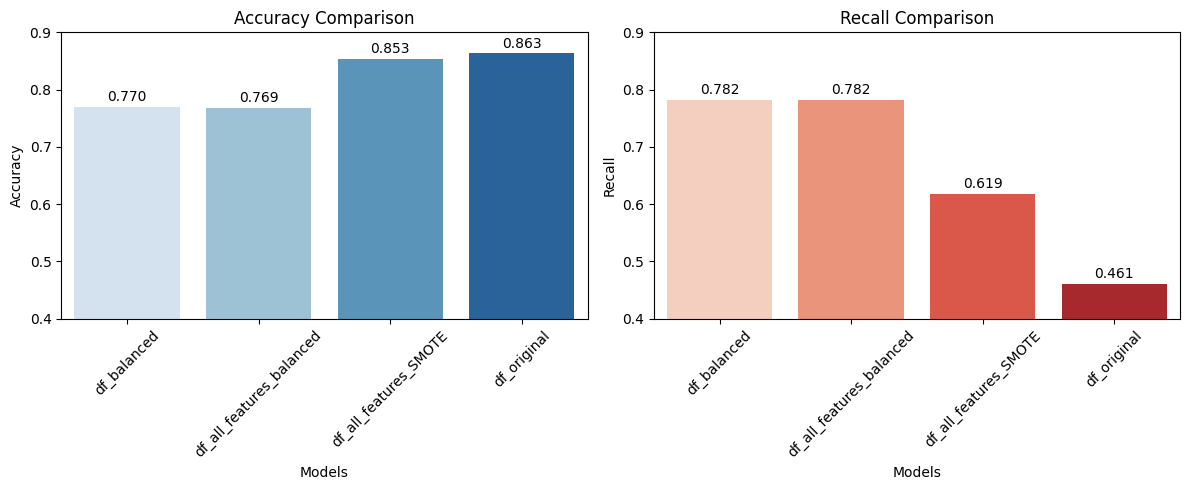

In [222]:
# Accuracy and Recall values for each model
models = ["df_balanced", "df_all_features_balanced", "df_all_features_SMOTE", "df_original"]
accuracy_values = [0.769764, 0.768542, 0.853222, 0.863125]  # Best accuracy from each model
recall_values = [0.782095, 0.782221, 0.618600, 0.460736]  # Best recall from each model

# Create figure and axes for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) # Side-by-side plot

# Accuracy Comparison
sns.barplot(x=models, y=accuracy_values, ax=axes[0], palette="Blues", hue=models)  # Set hue to 'models'
axes[0].set_title("Accuracy Comparison")
axes[0].set_ylabel("Accuracy")
axes[0].set_xlabel("Models")
axes[0].set_ylim(0.4, 0.9)
for i, v in enumerate(accuracy_values):
    axes[0].text(i, v + 0.01, f"{v:.3f}", ha='center', fontsize=10)
axes[0].tick_params(axis='x', rotation=45)  # Rotate the x-axis labels

# Recall Comparison
sns.barplot(x=models, y=recall_values, ax=axes[1], palette="Reds", hue=models)  # Set hue to 'models'
axes[1].set_title("Recall Comparison")
axes[1].set_ylabel("Recall")
axes[1].set_xlabel("Models")
axes[1].set_ylim(0.4, 0.9)
for i, v in enumerate(recall_values):
    axes[1].text(i, v + 0.01, f"{v:.3f}", ha='center', fontsize=10)
axes[1].tick_params(axis='x', rotation=45)  # Rotate the x-axis labels

# Display plots
plt.tight_layout()
plt.show()

## 4.7- Model 1: Testing with the Fully Trained Model

**Evaluate Model 1 (df_balanced) on the Test Set**

In [69]:
# Re-split the dataset for Model 1 testing
X_test_model1 = df_balanced.drop(columns=["churn"])  # Features
y_test_model1 = df_balanced["churn"]  # Target variable

X_train_model1, X_test_model1, y_train_model1, y_test_model1 = train_test_split(
    X_test_model1, y_test_model1, test_size=0.2, random_state=42, stratify=y_test_model1
)

# Dictionary to store test results for Model 1
test_results_model1 = {}

for model_name, model in trained_models_model1.items():  # Using trained models specific to Model 1
    # Make predictions on the test set
    y_pred = model.predict(X_test_model1)
    y_prob = model.predict_proba(X_test_model1)[:, 1] if hasattr(model, "predict_proba") else y_pred

    # Compute performance metrics
    cm = confusion_matrix(y_test_model1, y_pred)
    TN, FP, FN, TP = cm.ravel()

    test_results_model1[model_name] = {
        "Accuracy": accuracy_score(y_test_model1, y_pred),
        "Precision": precision_score(y_test_model1, y_pred, zero_division=1),
        "Recall": recall_score(y_test_model1, y_pred),
        "F1-Score": f1_score(y_test_model1, y_pred),
        "AUC": roc_auc_score(y_test_model1, y_prob),
        "Type I Error (FN Rate)": FN / (FN + TP) if (FN + TP) > 0 else 0,
        "Type II Error (FP Rate)": FP / (FP + TN) if (FP + TN) > 0 else 0,
    }

# Convert results dictionary to DataFrame
test_results_df_model1 = pd.DataFrame(test_results_model1).T

# Display summary results
print("Summary of test metrics for Model 1: df_balanced")
test_results_df_model1.sort_values(by="Accuracy", ascending=False)

Summary of test metrics for Model 1: df_balanced


,Accuracy,Precision,Recall,F1-Score,AUC,Type I Error (FN Rate),Type II Error (FP Rate)
XGBoost - Additional,0.795092,0.776498,0.828010,0.801427,0.852330,0.171990,0.237745
Random Forests - Paper,0.781595,0.781327,0.781327,0.781327,0.858421,0.218673,0.218137
MLP - Additional,0.766871,0.778920,0.744472,0.761307,0.850900,0.255528,0.210784
SVMs - Paper,0.755828,0.765306,0.737101,0.750939,0.819326,0.262899,0.225490
K-Nearest Neighbors - Paper,0.737423,0.760108,0.692875,0.724936,0.795792,0.307125,0.218137
Decision Trees - Paper,0.732515,0.745455,0.705160,0.724747,0.784690,0.294840,0.240196
Elastic Net - Paper,0.701840,0.722826,0.653563,0.686452,0.764122,0.346437,0.250000
Logistic Regression - Paper,0.698160,0.718157,0.651106,0.682990,0.765380,0.348894,0.254902
Naïve Bayes (NB) - Additional,0.548466,0.719101,0.157248,0.258065,0.765344,0.842752,0.061275


## 4.8- Model 2: Testing with the Fully Trained Model

**Evaluate Model 2 (df_all_features_balanced) on the Test Set**

In [83]:
# Define the target variable (y) and features (X) for Model 2
X_model_2 = df_all_features_balanced.drop(columns=["churn"])  # Features for Model 2
y_model_2 = df_all_features_balanced["churn"]  # Target variable

# Perform an 80/20 split for Model 2
X_train_model_2, X_test_model_2, y_train_model_2, y_test_model_2 = train_test_split(X_model_2, y_model_2, test_size=0.2, random_state=42, stratify=y_model_2)

# Dictionary to store test results for Model 2
test_results_model_2 = {}

for model_name, model in trained_models_model2.items():  # Using trained models specific to Model 2
    # Make predictions on the test set
    y_pred = model.predict(X_test_model_2)
    y_prob = model.predict_proba(X_test_model_2)[:, 1] if hasattr(model, "predict_proba") else y_pred

    # Compute performance metrics
    cm = confusion_matrix(y_test_model_2, y_pred)
    TN, FP, FN, TP = cm.ravel()

    # Store results in dictionary
    test_results_model_2[model_name] = {
        "Accuracy": accuracy_score(y_test_model_2, y_pred),
        "Precision": precision_score(y_test_model_2, y_pred, zero_division=1),
        "Recall": recall_score(y_test_model_2, y_pred),
        "F1-Score": f1_score(y_test_model_2, y_pred),
        "AUC": roc_auc_score(y_test_model_2, y_prob),
        "Type I Error (FN Rate)": FN / (FN + TP) if (FN + TP) > 0 else 0,
        "Type II Error (FP Rate)": FP / (FP + TN) if (FP + TN) > 0 else 0,
    }

# Convert results dictionary to DataFrame for better readability
test_results_df_model_2 = pd.DataFrame(test_results_model_2).T

# Display summary results for Model 2: df_all_features_balanced
print("Summary of test metrics for Model 2: df_all_features_balanced")
test_results_df_model_2.sort_values(by="Accuracy", ascending=False)

Summary of test metrics for Model 2: df_all_features_balanced


,Accuracy,Precision,Recall,F1-Score,AUC,Type I Error (FN Rate),Type II Error (FP Rate)
XGBoost - Additional,0.788957,0.773893,0.815725,0.794258,0.851948,0.184275,0.237745
Random Forests - Paper,0.781595,0.791349,0.764128,0.777500,0.858421,0.235872,0.200980
MLP - Additional,0.763190,0.780105,0.732187,0.755387,0.844414,0.267813,0.205882
SVMs - Paper,0.759509,0.774026,0.732187,0.752525,0.830187,0.267813,0.213235
Decision Trees - Paper,0.738650,0.744949,0.724816,0.734745,0.788996,0.275184,0.247549
K-Nearest Neighbors - Paper,0.723926,0.742021,0.685504,0.712644,0.793865,0.314496,0.237745
Elastic Net - Paper,0.703067,0.718833,0.665848,0.691327,0.767494,0.334152,0.259804
Logistic Regression - Paper,0.699387,0.720109,0.651106,0.683871,0.768289,0.348894,0.252451
Naïve Bayes (NB) - Additional,0.555828,0.758621,0.162162,0.267206,0.769102,0.837838,0.051471


## ROC curves MOdel 1 vs Model 2

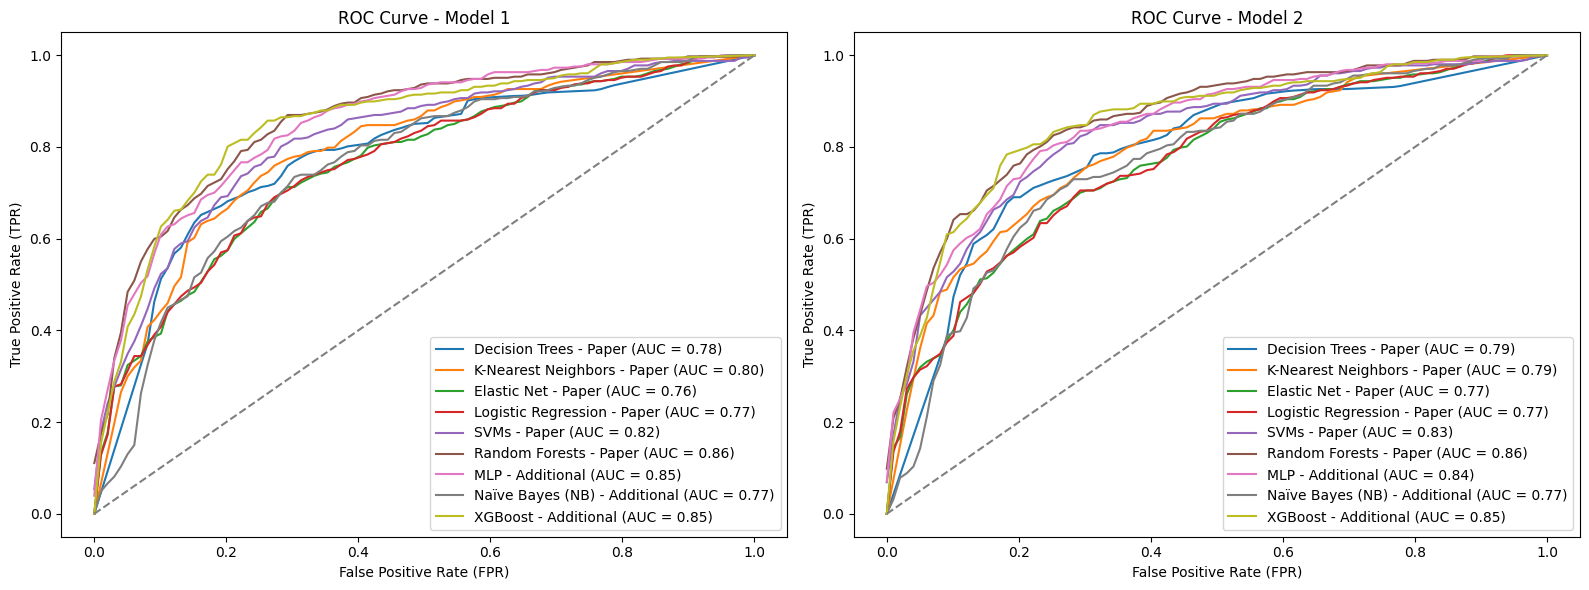

In [89]:
# Create dictionaries to store ROC data
roc_data_model1 = {}
roc_data_model2 = {}

# Generate ROC data for Model 1
for model_name, model in trained_models_model1.items():
    y_prob = model.predict_proba(X_test_model1)[:, 1] if hasattr(model, "predict_proba") else model.predict(X_test_model1)
    roc_data_model1[model_name] = [(y_test_model1, y_prob)]

# Generate ROC data for Model 2
for model_name, model in trained_models_model2.items():
    y_prob = model.predict_proba(X_test_model_2)[:, 1] if hasattr(model, "predict_proba") else model.predict(X_test_model_2)
    roc_data_model2[model_name] = [(y_test_model_2, y_prob)]

# Create subplots to compare both models side by side
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# 1️- Plot ROC Curve for Model 1
ax[0].set_title("ROC Curve - Model 1")
for model_name, data in roc_data_model1.items():
    mean_fpr = np.linspace(0, 1, 100)
    tpr_list = []
    auc_list = []

    for y_test, y_probs in data:
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        tpr_list.append(interp_tpr)
        auc_list.append(roc_auc)

    mean_tpr = np.mean(tpr_list, axis=0)
    mean_auc = np.mean(auc_list)
    ax[0].plot(mean_fpr, mean_tpr, label=f"{model_name} (AUC = {mean_auc:.2f})")

ax[0].plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random classifier baseline
ax[0].set_xlabel("False Positive Rate (FPR)")
ax[0].set_ylabel("True Positive Rate (TPR)")
ax[0].legend(loc="lower right")

# 2️- Plot ROC Curve for Model 2
ax[1].set_title("ROC Curve - Model 2")
for model_name, data in roc_data_model2.items():
    mean_fpr = np.linspace(0, 1, 100)
    tpr_list = []
    auc_list = []

    for y_test, y_probs in data:
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        tpr_list.append(interp_tpr)
        auc_list.append(roc_auc)

    mean_tpr = np.mean(tpr_list, axis=0)
    mean_auc = np.mean(auc_list)
    ax[1].plot(mean_fpr, mean_tpr, label=f"{model_name} (AUC = {mean_auc:.2f})")

ax[1].plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random classifier baseline
ax[1].set_xlabel("False Positive Rate (FPR)")
ax[1].set_ylabel("True Positive Rate (TPR)")
ax[1].legend(loc="lower right")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Comparison of Test Metrics for Model 1 (df_balanced) and Model 2 (df_all_features_balanced)

| Metric                         | Model 1 (df_balanced)          | Model 2 (df_all_features_balanced)  |
|---------------------------------|---------------------------------|-------------------------------------|
| **Accuracy**                    | XGBoost: 0.795092              | XGBoost: 0.788957                  |
| **Precision**                   | XGBoost: 0.776498              | XGBoost: 0.773893                  |
| **Recall**                      | XGBoost: 0.828010              | XGBoost: 0.815725                  |
| **F1-Score**                    | XGBoost: 0.801427              | XGBoost: 0.794258                  |
| **AUC**                         | XGBoost: 0.852330              | XGBoost: 0.851948                  |
| **Type I Error (FN Rate)**      | XGBoost: 0.171990              | XGBoost: 0.184275                  |
| **Type II Error (FP Rate)**     | XGBoost: 0.237745              | XGBoost: 0.237745                  |

---

### Does Controlling for Multicollinearity in Model 1 Have Any Valid Implications?

**Interpretation of Model**: **Multicollinearity control** helps in ensuring that the model's predictions and interpretations are more reliable. In the case of **linear models**, multicollinearity can distort the significance of features, leading to unreliable feature importance estimates. However, for **tree-based models** like XGBoost and Random Forests, multicollinearity has less impact on model performance. Therefore, even though multicollinearity control might not drastically affect the prediction results, it could lead to a more interpretable model, especially when analyzing feature importance.

### 3. **Conclusion:**
- **Model 1** (df_balanced) demonstrates slightly better overall performance than **Model 2** (df_all_features_balanced), especially in terms of **recall** and **accuracy**, which is crucial for customer churn prediction. The lower **Type I error** (FN rate) in Model 1 is a significant advantage, as it reduces the risk of missing churned customers.
  
- **Model 2** (df_all_features_balanced) shows good performance as well, with **XGBoost** being the top performer, but the overall results slightly lag behind Model 1. Additionally, the inclusion of more features in Model 2 can be valuable in certain contexts, though it does not provide a dramatic improvement in predictive performance.

- **Multicollinearity control** in Model 1, while not dramatically altering predictive performance, could lead to more reliable feature importance estimates in regression models, which can be useful in further analysis and interpretation of the model, especially when using linear models or interpreting feature relationships.

---

### 4. **Conclusion**:

- **Model 1** is the recommended model for **customer churn prediction** given its higher performance across key metrics, especially **recall** and **accuracy**, with **lower FN rates**. This is critical in ensuring that churned customers are correctly identified.
  
- **Model 2**, while slightly underperforming in some metrics, still offers good performance and may be beneficial if more detailed feature analysis or additional features are required.
